In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context(font_scale=1.5)

In [3]:
df = pd.read_csv('./data/HR_clean.csv')

# 连续值

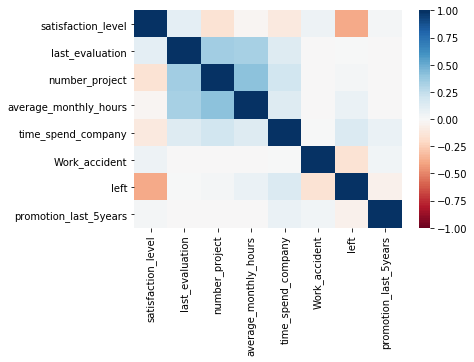

In [5]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.color_palette('RdBu',n_colors=128))

# 离散值

In [6]:
s1 = pd.Series(['X1','X1','X2','X2','X2','X2'])
s2 = pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])

In [31]:
#熵
def getEntropy(s):
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = np.array(s.groupby(s).count().values / float(len(s)))
    return -(np.log2(prt_ary) * prt_ary).sum()

In [32]:
getEntropy(s1)

0.9182958340544896

In [33]:
getEntropy(s2)

1.0

In [34]:
#条件熵
def getCondEntropy(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
    return sum([getEntropy(d[k]) * len(d[k]) / float(len(a1)) for k in d])

In [35]:
getCondEntropy(s1, s2)

0.5408520829727552

In [36]:
getCondEntropy(s2, s1)

0.4591479170272448

In [37]:
#熵增益
def getEntropyGain(a1, a2):
    return getEntropy(a2) - getCondEntropy(a1, a2)

In [39]:
getEntropyGain(s2, s1)

0.4591479170272448

In [40]:
#熵增益率
def getEntropyGainRatio(a1, a2):
    return getEntropyGain(a1, a2) / getEntropy(a2)

In [42]:
getEntropyGainRatio(s2, s1)

0.5

In [43]:
import math

In [44]:
#相关度
def getDiscreteRelation(a1, a2):
    return getEntropyGain(a1, a2) / math.sqrt(getEntropy(a1) * getEntropy(a2))

In [45]:
getDiscreteRelation(s2, s1)

0.4791387674918639

In [46]:
getDiscreteRelation(s1, s2)

0.4791387674918639

Gini系数

In [50]:
#可能性平方和
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = np.array(s.groupby(s).count().values / float(len(s)))
    return sum(prt_ary ** 2)

In [51]:
#Gini
def getGini(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
    return 1 - sum([getProbSS(d[k]) * len(d[k]) / float(len(a1)) for k in d])

In [52]:
getGini(s1,s2)

0.25

In [53]:
getGini(s2,s1)

0.2222222222222222